# Wine Quality Prediction
### This notebook is to determine which properties contribute to a high quality wine and to predict the quality of wine based on the given data.

# Import Essential Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

sb.set()

# Importing and Understanding the Data

In [2]:
wine_quality = pd.read_csv('winequality.csv')
wine_quality

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
# Replace the spaces in the variable names with underscores.
wine_quality.columns = wine_quality.columns.str.replace(" ","_")

In [4]:
wine_quality.shape

(6497, 13)

In [5]:
wine_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed_acidity         6487 non-null   float64
 2   volatile_acidity      6489 non-null   float64
 3   citric_acid           6494 non-null   float64
 4   residual_sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free_sulfur_dioxide   6497 non-null   float64
 7   total_sulfur_dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
wine_quality.replace({'white': 1, 'red': 0}, inplace=True)

Replace `red` and `white` with `0` and `1` for the ease of analysis.

In [7]:
wine_quality.describe()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,0.753886,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,0.430779,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,1.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,1.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,1.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### Remove `null` values

In [8]:
wine_quality.isnull().sum()

type                     0
fixed_acidity           10
volatile_acidity         8
citric_acid              3
residual_sugar           2
chlorides                2
free_sulfur_dioxide      0
total_sulfur_dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

Replace the `null` values with the mean.

In [9]:
for col in wine_quality.columns:
  if wine_quality[col].isnull().sum() > 0:
    wine_quality[col] = wine_quality[col].fillna(wine_quality[col].mean())
 
wine_quality.isnull().sum()

type                    0
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Histograms of the Variables

array([[<AxesSubplot:title={'center':'type'}>,
        <AxesSubplot:title={'center':'fixed_acidity'}>,
        <AxesSubplot:title={'center':'volatile_acidity'}>,
        <AxesSubplot:title={'center':'citric_acid'}>],
       [<AxesSubplot:title={'center':'residual_sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free_sulfur_dioxide'}>,
        <AxesSubplot:title={'center':'total_sulfur_dioxide'}>],
       [<AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>],
       [<AxesSubplot:title={'center':'quality'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

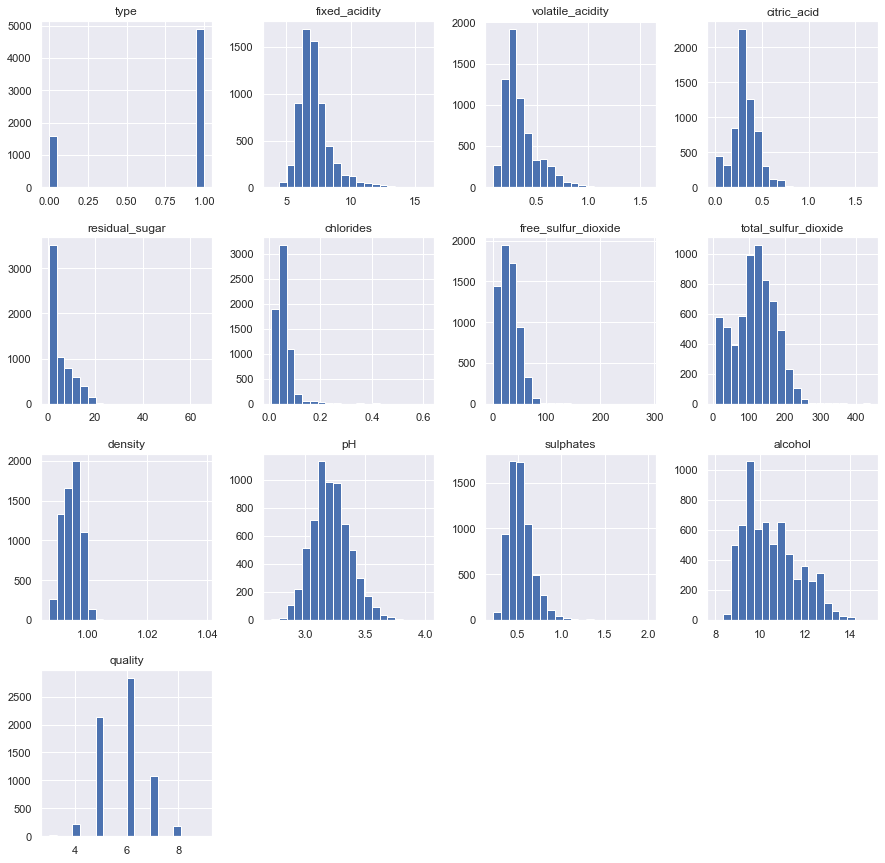

In [10]:
wine_quality.hist(bins = 20, figsize = (15, 15))

### Summary of `quality`

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


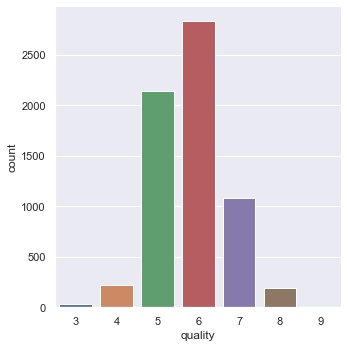

In [11]:
print(wine_quality["quality"].value_counts())
sb.catplot(x = "quality", data = wine_quality, kind = "count")

<AxesSubplot:>

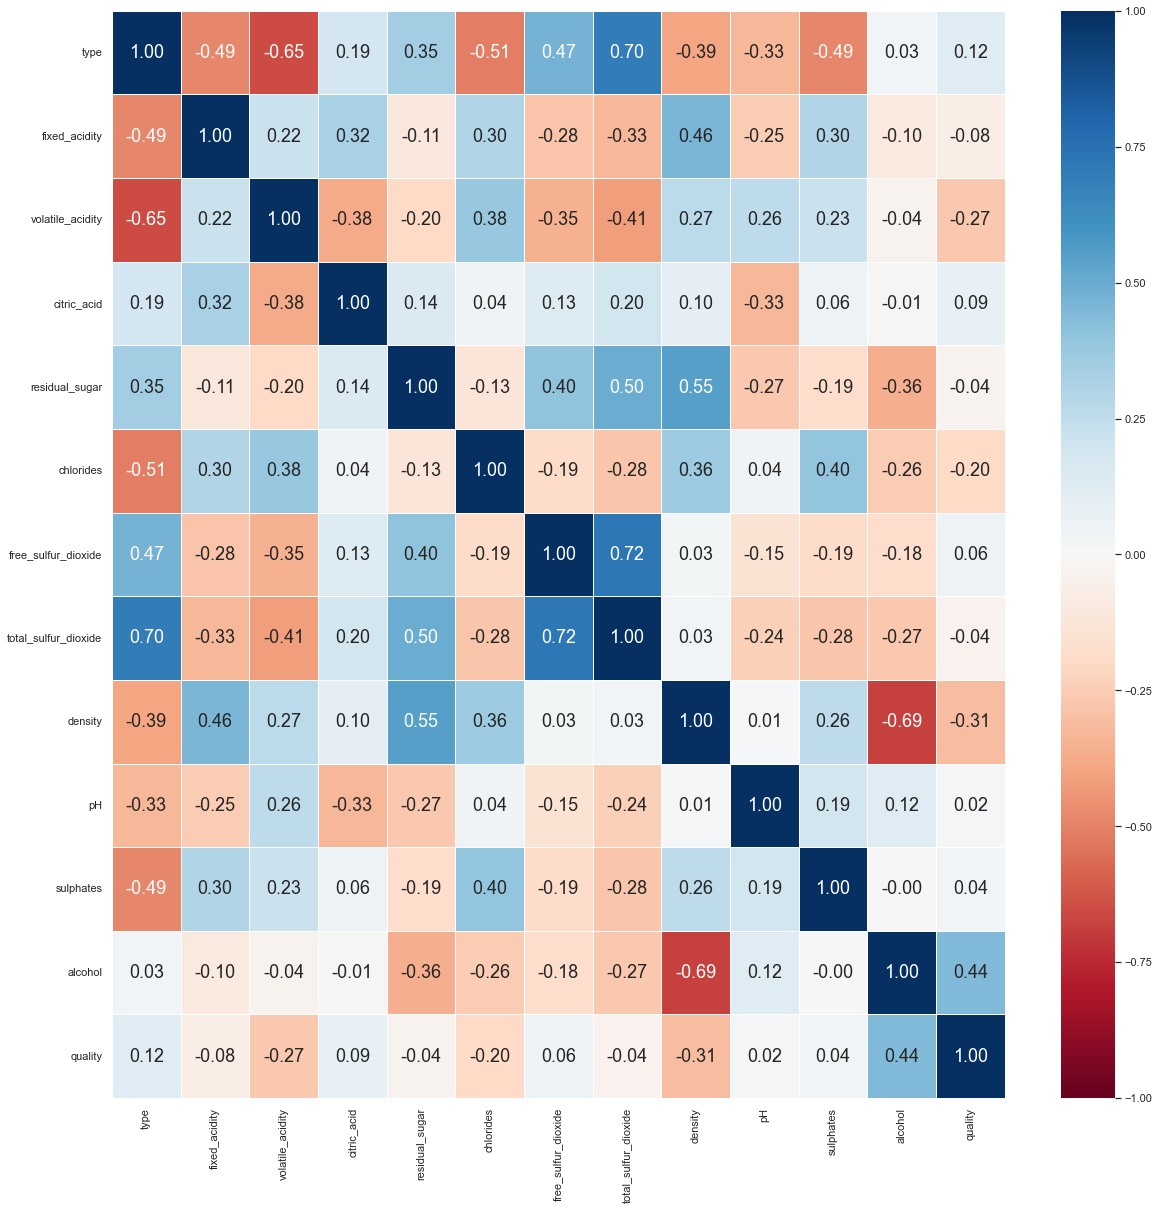

In [12]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(wine_quality.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

From the heatmap, we can observe that `sulphates`, `citric_acid`, `volatile_acidity` and `alcohol` (which is the alcohol percentage) have relatively high correlation with the `quality` of the wine. (>= 0.20)   
We can also see that `pH`, `free_sulfur_dioxide` and `residual_sugar` have very low correlation with `quality` (<= 0.01).

### Remove Variables that are Highly Correlated with Each Other

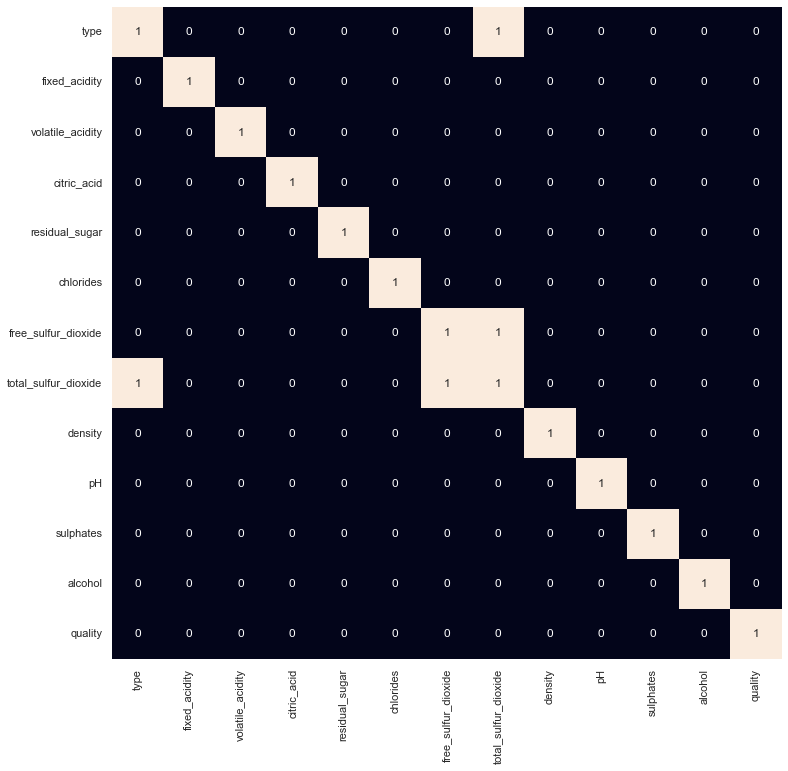

In [13]:
plt.figure(figsize=(12, 12))
sb.heatmap(wine_quality.corr() > 0.7, annot=True, cbar=False)
plt.show()

From the above heatmap, we realize that `free_sulfur_dioxide` and `total_sulfur_dioxide` is highly correlated with each other (>0.7). Thus, we drop one of the variables because relationship among them is equal, they equally impact on model accuracy.

In [14]:
wine_quality = wine_quality.drop('total_sulfur_dioxide', axis=1)

To be able to classify the wine into 2 groups, we add a new variable `good_quality` where wine with `quality` >= 7 will be considered good quality.

In [15]:
wine_quality['good_quality'] = [ 1 if x>=7 else 0 for x in wine_quality.quality] 

In [16]:
wine_quality.head(10)

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,density,pH,sulphates,alcohol,quality,good_quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8,6,0
1,1,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6,0
2,1,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1,6,0
3,1,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,0
4,1,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,0
5,1,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1,6,0
6,1,6.2,0.32,0.16,7.0,0.045,30.0,0.9949,3.18,0.47,9.6,6,0
7,1,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8,6,0
8,1,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6,0
9,1,8.1,0.22,0.43,1.5,0.044,28.0,0.9938,3.22,0.45,11.0,6,0


# Prediction of Wine Quality

In [17]:
# Extract Response and Predictors
y = wine_quality["good_quality"]
X = wine_quality.drop(['good_quality', 'quality'], axis=1)

## Train Test Split

In [18]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [19]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (4872,) (4872, 11)
Test Set  : (1625,) (1625, 11)


## Random Forest Classification

In [20]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
y_pred = rf.predict(X_test)

In [22]:
# rf.score(X_test, y_test) will provide a same value
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8855384615384615


In [23]:
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

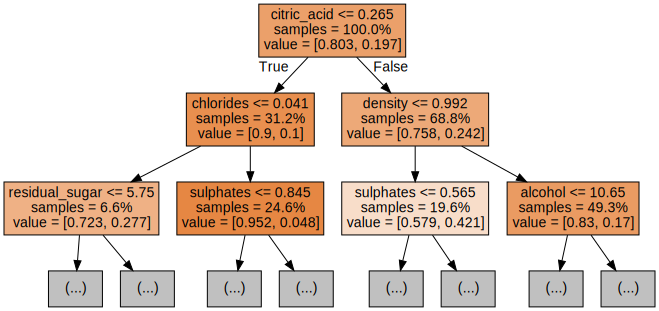

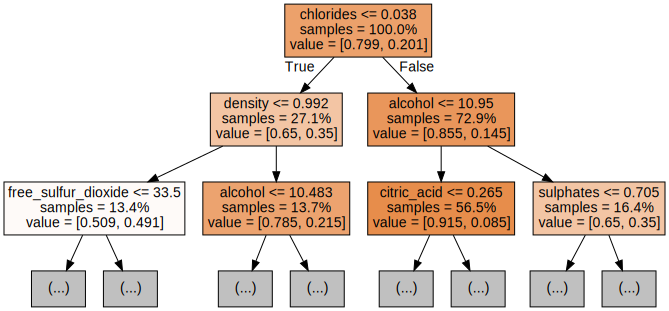

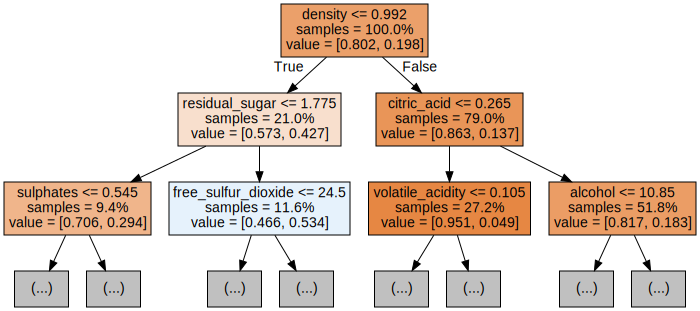

In [24]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

<AxesSubplot:>

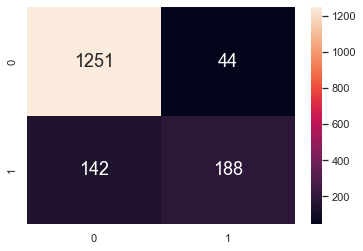

In [25]:
sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### Hyperparameter Tuning

In [27]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024417A6C2E0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024417A48E50>})

`n_estimators`: the number of decision trees in the forest   
`max_depth`: the maximum depth of each decision tree in the forest

In [28]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 17, 'n_estimators': 422}


In [29]:
rf = RandomForestClassifier(n_estimators = 422, max_depth = 17)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=17, n_estimators=422)

In [30]:
y_pred = rf.predict(X_test)

<AxesSubplot:>

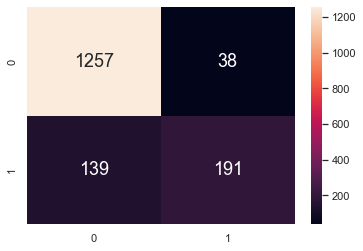

In [31]:
sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [32]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8910769230769231


## Conclusion

From the two results obtained above, we can see that after hyperparameter tuning, we improved our accuracy from 0.8855 to 0.8911. By choosing the optimal parameters, we can improve our prediction.